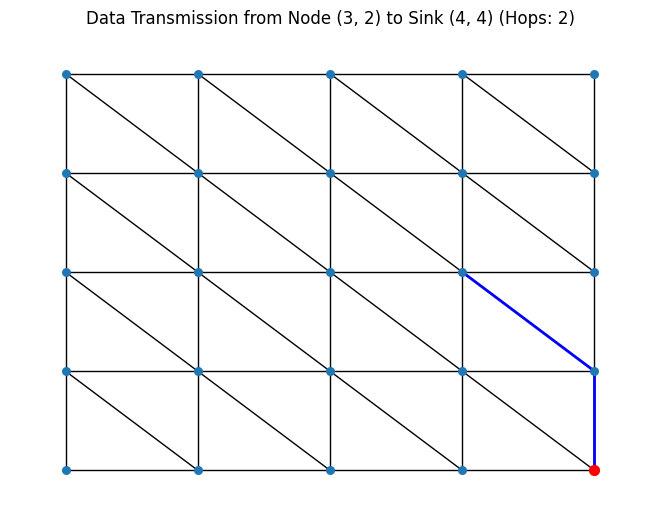

Data Transmission Path from Node (3, 2) to Sink (4, 4): [(3, 2), (4, 3), (4, 4)]
Total Hops: 2


In [24]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0), (4, 4), (0, 4)]  # Coordinates of three sink nodes
sink_ids = sink_coordinates

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
source_node = (3,2)

# Calculate the shortest path from the source node to all sinks
shortest_paths = [nx.shortest_path(G, source=source_node, target=sink_id) for sink_id in sink_ids]

# Find the sink with the shortest path
nearest_sink_index = 0
shortest_path_length = len(shortest_paths[0])
for i in range(1, len(sink_ids)):
    path_length = len(shortest_paths[i])
    if path_length < shortest_path_length:
        nearest_sink_index = i
        shortest_path_length = path_length

nearest_sink = sink_ids[nearest_sink_index]
shortest_path = shortest_paths[nearest_sink_index]

# Highlight the path from the source node to the nearest sink node
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

# Visualize the Sensor Network with the Sink Node and Data Transmission Path
plt.figure()
nx.draw(G, pos, node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='red', node_size=50)  # Highlight the nearest sink node
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission path
plt.title(f'Data Transmission from Node {source_node} to Sink {nearest_sink} (Hops: {len(shortest_path) - 1})')
plt.show()

# Print the path from the source node to the nearest sink node
print(f"Data Transmission Path from Node {source_node} to Sink {nearest_sink}: {shortest_path}")
print(f"Total Hops: {len(shortest_path) - 1}")


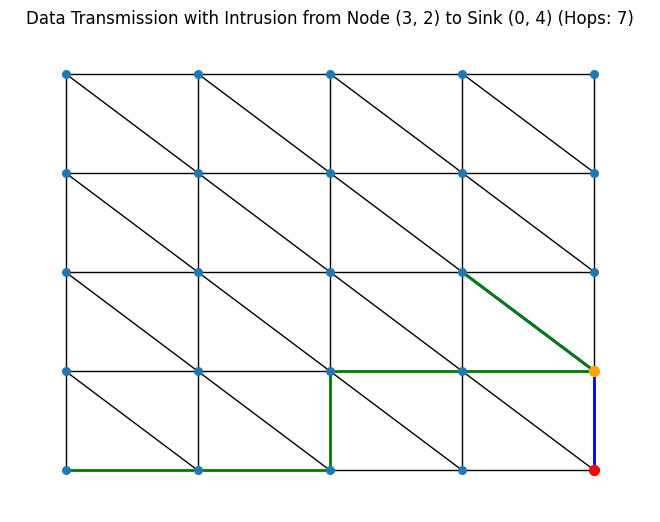

Data Transmission Path from Node (3, 2) to Intrusion Node (4, 3): [(3, 2), (4, 3), (4, 3), (3, 3), (2, 3), (2, 4), (1, 4), (0, 4)]
Total Hops (Before Intrusion): 2
Total Hops (After Intrusion): 7


In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0), (4, 4), (0, 4)]  # Coordinates of three sink nodes
sink_ids = sink_coordinates

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
source_node = (3, 2)

# Calculate the shortest path from the source node to all sinks
shortest_paths = [nx.shortest_path(G, source=source_node, target=sink_id) for sink_id in sink_ids]

# Find the sink with the shortest path
nearest_sink_index = 0
shortest_path_length = len(shortest_paths[0])
for i in range(1, len(sink_ids)):
    path_length = len(shortest_paths[i])
    if path_length < shortest_path_length:
        nearest_sink_index = i
        shortest_path_length = path_length

nearest_sink = sink_ids[nearest_sink_index]
shortest_path = shortest_paths[nearest_sink_index]

# Highlight the path from the source node to the nearest sink node
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

# Visualize the Sensor Network with the Sink Node and Data Transmission Path
plt.figure()
nx.draw(G, pos, node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist=[nearest_sink], node_color='red', node_size=50)  # Highlight the nearest sink node
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission path

# Simulate intrusion attack by redirecting data to the farthest sink after reaching the intrusion node
intrusion_node = (4, 3)  # Coordinates of the intrusion node
intrusion_sink = max(sink_ids, key=lambda sink: nx.shortest_path_length(G, source=intrusion_node, target=sink))
intrusion_path = nx.shortest_path(G, source=source_node, target=intrusion_node) + nx.shortest_path(G, source=intrusion_node, target=intrusion_sink)

# Highlight the intrusion node and the path of redirected data transmission
intrusion_path_edges = [(intrusion_path[i], intrusion_path[i + 1]) for i in range(len(intrusion_path) - 1)]
nx.draw_networkx_nodes(G, pos, nodelist=[intrusion_node], node_color='orange', node_size=50)  # Highlight the intrusion node
nx.draw_networkx_edges(G, pos, edgelist=intrusion_path_edges, edge_color='green', width=2)  # Highlight the redirected data transmission path

plt.title(f'Data Transmission with Intrusion from Node {source_node} to Sink {intrusion_sink} (Hops: {len(intrusion_path) - 1})')
plt.show()

# Print the path from the source node to the intrusion node and the redirected path to the farthest sink
print(f"Data Transmission Path from Node {source_node} to Intrusion Node {intrusion_node}: {intrusion_path}")
print(f"Total Hops (Before Intrusion): {len(shortest_path) - 1}")
print(f"Total Hops (After Intrusion): {len(intrusion_path) - 1}")


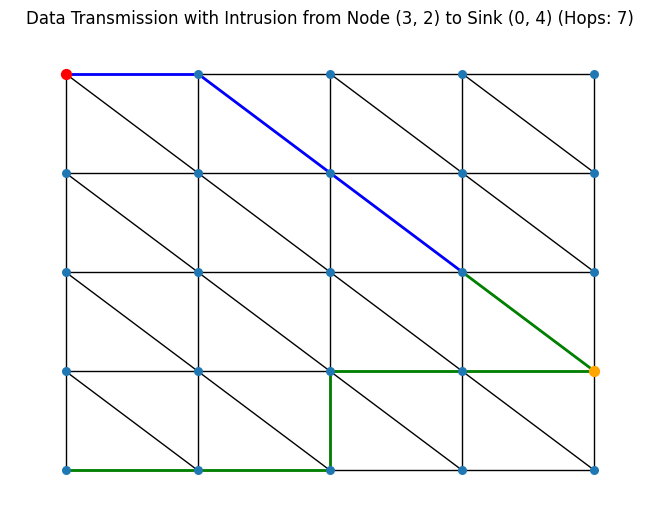

Data Transmission Path from Node (3, 2) to Second Smallest Distance Sink (0, 0): [(3, 2), (2, 1), (1, 0), (0, 0)]
Total Hops (avoiding Intrusion): 3
Total Hops (Following corrupt nodes Intrusion): 7


In [32]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def avoid_intrusion_direct_routing(graph, source, sinks, intrusion_node):
    # Calculate distances from source to sinks excluding the intrusion node
    distances = {}
    for sink in sinks:
        if sink != intrusion_node:
            distance = nx.shortest_path_length(graph, source=source, target=sink, weight=None, method='dijkstra')
            distances[sink] = distance

    # Sort sinks based on distances and get the second smallest distance sink
    sorted_sinks = sorted(distances.keys(), key=lambda sink: distances[sink])
    second_smallest_sink = sorted_sinks[1] if len(sorted_sinks) > 1 else sorted_sinks[0]

    # Calculate the shortest path from source to the second smallest distance sink
    shortest_path = nx.shortest_path(graph, source=source, target=second_smallest_sink, weight=None, method='dijkstra')

    return shortest_path, second_smallest_sink

# Create a grid-based graph with diagonal connections (adjust the grid size as needed)
G = nx.grid_2d_graph(5, 5)
G.add_edges_from(((n, (n[0] + 1, n[1] + 1)) for n in G.nodes if (n[0] + 1, n[1] + 1) in G.nodes))

# Define the sink node coordinates
sink_coordinates = [(0, 0), (4, 4), (0, 4)]  # Coordinates of three sink nodes
sink_ids = sink_coordinates

# Assign positions to nodes in the grid
pos = {(x, y): (x, -y) for x, y in G.nodes()}

# Select a random source node that is not a sink
source_node = (3, 2)

# Intrusion node
intrusion_node = (4, 3)

# Calculate the shortest path to the second smallest distance sink while avoiding the intrusion node
shortest_path, second_smallest_sink = avoid_intrusion_direct_routing(G, source_node, sink_ids, intrusion_node)

# Highlight the path from the source node to the second smallest distance sink
path_edges = [(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)]

# Visualize the Sensor Network with the Sink Node and Data Transmission Path
plt.figure()
nx.draw(G, pos, node_size=30)
nx.draw_networkx_nodes(G, pos, nodelist=[second_smallest_sink], node_color='red', node_size=50)  # Highlight the second smallest distance sink node
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=2)  # Highlight the data transmission path

# Simulate intrusion attack by redirecting data to the farthest sink after reaching the intrusion node
intrusion_sink = max(sink_ids, key=lambda sink: nx.shortest_path_length(G, source=intrusion_node, target=sink))
intrusion_path = nx.shortest_path(G, source=source_node, target=intrusion_node) + nx.shortest_path(G, source=intrusion_node, target=intrusion_sink)

# Highlight the intrusion node and the path of redirected data transmission
intrusion_path_edges = [(intrusion_path[i], intrusion_path[i + 1]) for i in range(len(intrusion_path) - 1)]
nx.draw_networkx_nodes(G, pos, nodelist=[intrusion_node], node_color='orange', node_size=50)  # Highlight the intrusion node
nx.draw_networkx_edges(G, pos, edgelist=intrusion_path_edges, edge_color='green', width=2)  # Highlight the redirected data transmission path

plt.title(f'Data Transmission with Intrusion from Node {source_node} to Sink {intrusion_sink} (Hops: {len(intrusion_path) - 1})')
plt.show()

# Print the path from the source node to the second smallest distance sink and the redirected path to the farthest sink
print(f"Data Transmission Path from Node {source_node} to Second Smallest Distance Sink {second_smallest_sink}: {shortest_path}")
print(f"Total Hops (avoiding Intrusion): {len(shortest_path) - 1}")
print(f"Total Hops (Following corrupt nodes Intrusion): {len(intrusion_path) - 1}")


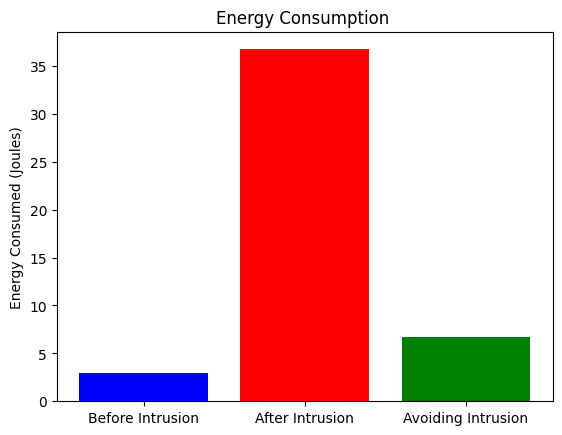

In [34]:
import matplotlib.pyplot as plt

# Constants
energy_per_hop = 0.75  # Energy consumed per hop in joules
path_loss_exponent = 2  # Path loss exponent

# Function to calculate energy consumed based on distance
def calculate_energy(distance):
    return energy_per_hop * (distance ** path_loss_exponent)

# Number of hops in each scenario
hops_before_intrusion = 2
hops_after_intrusion = 7
hops_avoiding_intrusion = 3

# Energy consumed in each scenario
energy_before_intrusion = calculate_energy(hops_before_intrusion)
energy_after_intrusion = calculate_energy(hops_after_intrusion)
energy_avoiding_intrusion = calculate_energy(hops_avoiding_intrusion)

# Plotting
scenarios = ['Before Intrusion', 'After Intrusion', 'Avoiding Intrusion']
energy_consumed = [energy_before_intrusion, energy_after_intrusion, energy_avoiding_intrusion]

plt.bar(scenarios, energy_consumed, color=['blue', 'red', 'green'])
plt.ylabel('Energy Consumed (Joules)')
plt.title('Energy Consumption ')
plt.show()


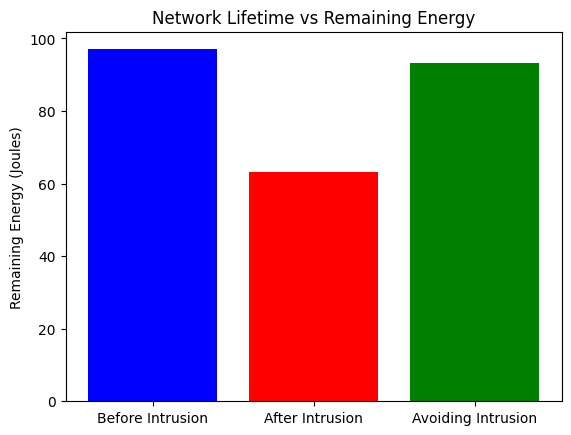

In [2]:
import matplotlib.pyplot as plt

# Constants
initial_energy = 100.0  # Initial energy in joules

# Function to calculate remaining energy based on distance and path loss exponent
def calculate_remaining_energy(initial_energy, hops, energy_per_hop, path_loss_exponent):
    energy_consumed = energy_per_hop * (hops ** path_loss_exponent)
    remaining_energy = max(initial_energy - energy_consumed, 0.0)
    return remaining_energy

# Number of hops in each scenario
hops_before_intrusion = 2
hops_after_intrusion = 7
hops_avoiding_intrusion = 3

# Calculate remaining energy in each scenario
remaining_energy_before_intrusion = calculate_remaining_energy(initial_energy, hops_before_intrusion, energy_per_hop, path_loss_exponent)
remaining_energy_after_intrusion = calculate_remaining_energy(initial_energy, hops_after_intrusion, energy_per_hop, path_loss_exponent)
remaining_energy_avoiding_intrusion = calculate_remaining_energy(initial_energy, hops_avoiding_intrusion, energy_per_hop, path_loss_exponent)

# Plotting
scenarios = ['Before Intrusion', 'After Intrusion', 'Avoiding Intrusion']
remaining_energy = [remaining_energy_before_intrusion, remaining_energy_after_intrusion, remaining_energy_avoiding_intrusion]

plt.bar(scenarios, remaining_energy, color=['blue', 'red', 'green'])
plt.ylabel('Remaining Energy (Joules)')
plt.title('Network Lifetime vs Remaining Energy')
plt.show()
